Loading the csv file for the Cab_Data.csv and checking for its outliers. The boxplot seems to not have any outliers as it is not above the maximum value or below the minimum value.

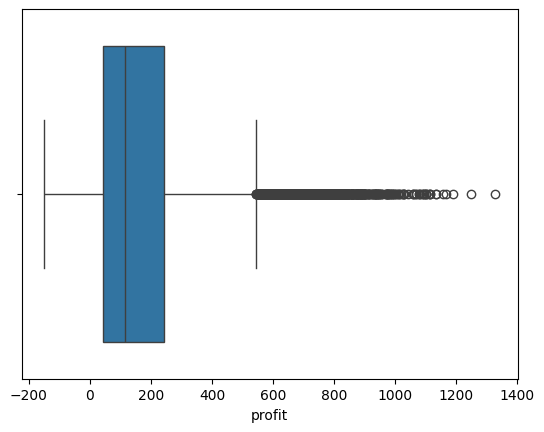

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#This code loads the dataset by using pandas library
df1 = pd.read_csv('Cab_Data.csv', on_bad_lines='skip')

#Creating a new column called profit
df1['profit'] = df1['Price Charged'] - df1['Cost of Trip']

#Using seaborn and drawing boxplot by using the profit column
sns.boxplot(x=df1['profit'])

#saving the graph in a png form by using savefig()
plt.savefig('boxplot_new.png')

#Hypothesis:
#In the code above, I loaded the first dataset, which is Cab_Data.csv, and verified the whether the outliers are presentor not by using the boxplot chart. In the boxplot below,
# it seems that there are no outliers as the minimum is -150.38, and maximum is 1327.6219999999998, so there are no values which are less than minimum or above the maximum.


In [ ]:
#This shows the first 5 rows of all the columns row values
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


Bar chart for comparing the average profits of both Pink and Yellow Cab Companies

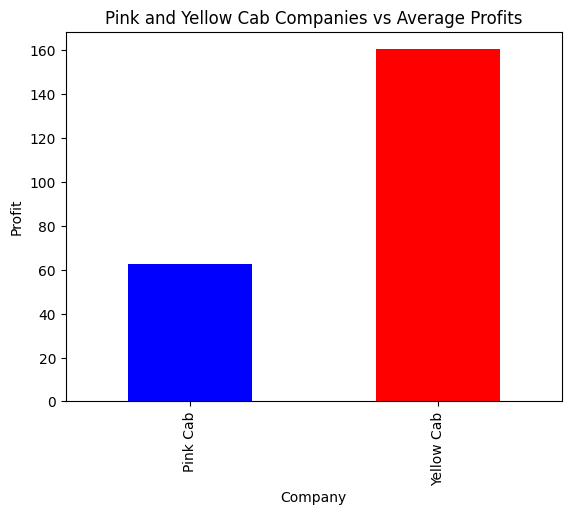

In [ ]:
#This code provides the categories for Company column values, which are pink and yellow cabs, and these categories corresponds to the average profits of these two cabs.
average_profit = df1.groupby('Company')['profit'].mean()

#I used the above series for average profits for both yellow and pink cab, and this code is used to plot the bar chart for average profit comparisons
average_profit.plot(kind='bar', color=['blue', 'red'])

#x label for the graph
plt.xlabel('Company')
#y label for the graph
plt.ylabel('Profit')
#the title of the graph above
plt.title('Pink and Yellow Cab Companies vs Average Profits')
#saving the image as png
plt.savefig('barplot_comparison_profits.png')

#EDA Recommendation
# Based on the exploratory data analysis, it is recommended to further investigate the factors contributing to the higher average profits of Yellow Cabs compared to Pink Cabs.
# This includes analyzing variables such as trip duration, fare rates, customer satisfaction, and the operational strategies of both cab companies.

# Hypothesis Results
# In the bar chart below, I am comparing the average profits for two cab companies, Yellow and Pink Cabs.
# As you can see, the data indicates that the Yellow Cab company has more average profits, with a maximum profit of approximately $158,
# while the Pink Cab has an average profit of about $63. If this hypothesis holds true, it suggests that XYZ firm should consider investing in the Yellow Cab company
# due to its stronger profitability. This analysis supports the notion that Yellow Cabs may provide a more lucrative investment opportunity.

In [ ]:
#This loads the dataset for City.csv
df2 = pd.read_csv('City.csv')
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Stacked bar chart with the number of trips in different cities for both yellow and pink cabs

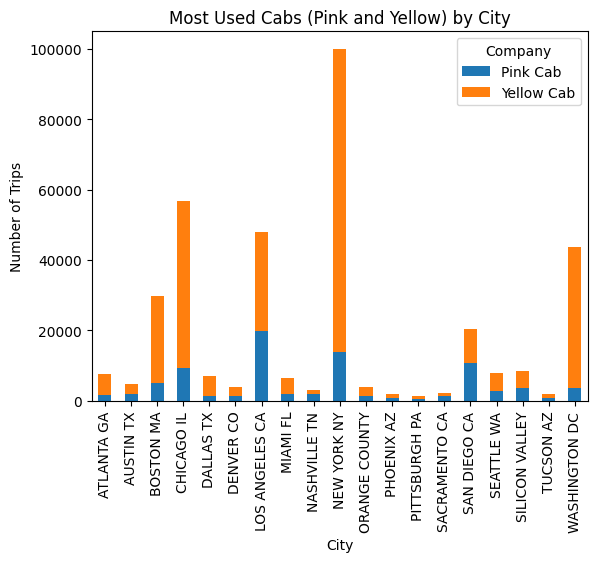

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

#The series type that provides the categories for both cities and company values and counts the number of companies appears in each city. The unstack() converts it
#into the dataframe when having multi index.
city_company_counts = df1.groupby(['City', 'Company'])['Company'].count().unstack()

#Then I use the series to plot the bar chart for showing number of trips.
city_company_counts.plot(kind='bar', stacked=True)

#x label
plt.xlabel('City')
#y label
plt.ylabel('Number of Trips')
#title for the bar chart graph
plt.title('Most Used Cabs (Pink and Yellow) by City')

#provides the particular color representation for both pink and yellow cab companies
plt.legend(title='Company')

#saving the image as png
plt.savefig('stacked_bar_city_company.png')
#providing the output of the graph image
plt.show()

#Hypothesis
# As you can see in the stacked bar chart below, the most used cabs are yellow cabs.
# In most of the countries, the most used cab is yellow. For instance, in the city
# New York, the number of trips for pink cabs is approximately 1,600, while the yellow cab
# has 980,000 trips.

# Based on the stacked bar chart analysis, it appears that yellow cabs are predominantly used
# over pink cabs in New York, as evidenced by the trip counts.
# This indicates a strong preference for yellow cabs among consumers in that area.
# If these trends hold true across other locations, this may reflect a broader market trend
# that XYZ firm should consider when deciding on cab investments.

#Recommendations:
#Data Visualizations: I would have made a graph such as linear or pie chart to better show the distribution of the values for this particular goal.

In [ ]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


The bar chart that represents the most number of trips for both yellow and pink cabs in the year of 1970

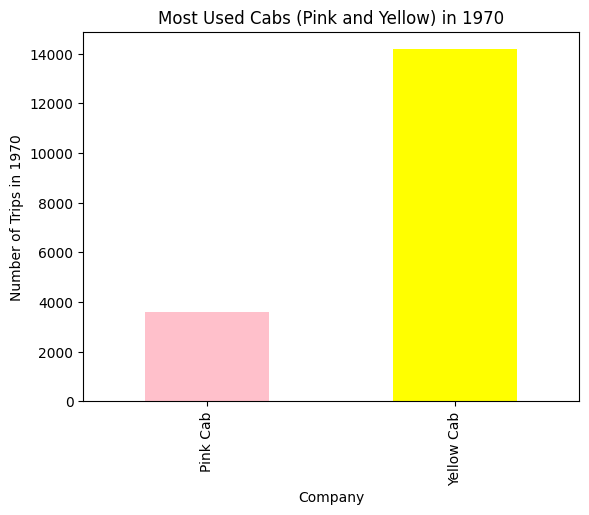

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

#converting the Date of Travel column in the DataFrame df1 to a datetime format using the pd.to_datetime() function from pandas.
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'])

#choosing the only the values from the dat of travel with the values of 1970 from df1 dataset
df1_1970 = df1[df1['Date of Travel'].dt.year == 1970]

#The series type that provides the categories for company values and counts the number of companies appears
company_counts_1970 = df1_1970.groupby('Company')['Company'].count()

#plotting the bar chart by using teh previous series and making each of the column values from the Company color pink and yellow
company_counts_1970.plot(kind='bar', color = ['pink', 'yellow'])


#x label
plt.xlabel('Company')
#y label
plt.ylabel('Number of Trips in 1970')
#title for the bar chart graph
plt.title('Most Used Cabs (Pink and Yellow) in 1970')

#saving the image as png
plt.savefig('bar_chart_1970.png')

#showing the plot
plt.show()

# Hypothesis Result for Bar Chart of Most Used Cabs in 1970

# The bar chart above showcases the number of trips undertaken by Yellow and Pink Cab companies in the year 1970.
# As depicted, Yellow Cabs had significantly more trips compared to Pink Cabs in that year.
# This suggests a higher demand or preference for Yellow Cabs in the market during 1970.
# If this trend holds for other years, it indicates that Yellow Cabs potentially have a stronger market share and possibly higher profitability.
# This information can be useful for XYZ firm in making informed decisions about which cab company to invest in, potentially favoring the Yellow Cab company given their historical dominance.

#EDA Recommendations:
#We should collect and analyze data on customer demographics (age, gender, income level) to better understand who is using each cab company.
#This could provide insights into targeted marketing strategies.

In [ ]:
df2 = pd.read_csv('City.csv')
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


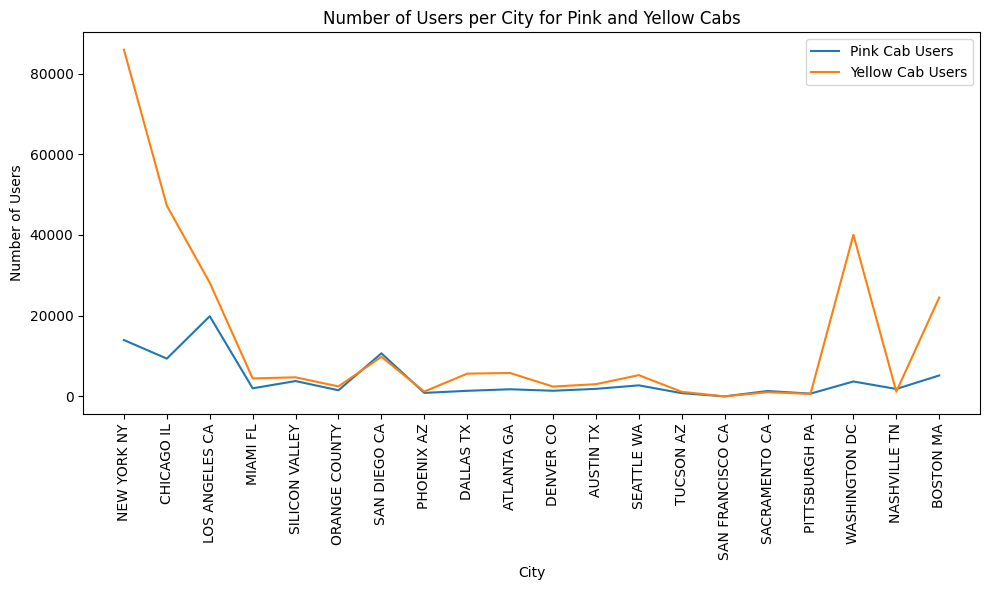

In [ ]:

#The series type that provides the categories for both cities and company values and counts the number of companies appears in each city. The unstack() converts it
#into the dataframe when having multi index.
city_company_counts = df1.groupby(['City', 'Company'])['Company'].count().unstack()

#replaces the previous index into a default index values like 0, 1, 2, 3, ...
city_company_counts = city_company_counts.reset_index()

#Renaming the prevous columns
city_company_counts = city_company_counts.rename(
    columns={'Pink Cab': 'Pink Cab Users', 'Yellow Cab': 'Yellow Cab Users'}
)

#Merging or combining the series values with the df2 dataset
merged_df = pd.merge(df2, city_company_counts, on='City', how='left')

#replacing the NaN values with 0
merged_df = merged_df.fillna(0)

#size of the plot
plt.figure(figsize=(10, 6))
#drawing only the line graph for pink cab users
plt.plot(merged_df['City'], merged_df['Pink Cab Users'], label='Pink Cab Users')
#drawing only the line graph for yellow cab users
plt.plot(merged_df['City'], merged_df['Yellow Cab Users'], label='Yellow Cab Users')
#x label
plt.xlabel('City')
#y label
plt.ylabel('Number of Users')
#title of the graph
plt.title('Number of Users per City for Pink and Yellow Cabs')
#rotating the x label values into 90 degrees
plt.xticks(rotation=90)
#provides the particular color representation for both pink and yellow cab companies
plt.legend()
#adjust the spacing between subplots to minimize overlap and ensure that all elements are neatly contained within the figure area.
plt.tight_layout()
#plotting line graph
plt.show()

# Hypothesis Result for Line Graph of Number of Users per City

# The line graph above visually depicts the number of users for Pink and Yellow Cabs in different cities.
# It seems that the Yellow Cabs consistently have a larger user base across most cities compared to Pink Cabs.
# This indicates a potential market share dominance for Yellow Cabs.
# Notably, in certain cities, the difference in user numbers is significant, which may reflect a strong preference for Yellow Cabs in those areas.
# If these trends persist, it implies a greater demand for Yellow Cabs, potentially contributing to higher profitability for the company.
# This information can guide XYZ firm's investment decisions, possibly favouring the Yellow Cab company due to its extensive user base.

#EDA Recommendations:
#I can analyze trends and patterns, and observe the overall trends in user counts for both companies across different cities.

In [ ]:
#loading dataset called Transaction_ID.csv
df3 = pd.read_csv('Transaction_ID.csv')
df3

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290.0,Card
1,10000012,27703.0,Card
2,10000013,28712.0,Cash
3,10000014,28020.0,Cash
4,10000015,27182.0,Card
...,...,...,...
307683,10307694,42426.0,Cash
307684,10307695,42819.0,Cash
307685,10307696,44212.0,Card
307686,10307697,44827.0,Card


In [ ]:
#Replacing NaN values with 0
df3 = df3.fillna(0)
#Checking the sum of the null values whether there are null values left or not
df3.isnull().sum()


,0
Transaction ID,0
Customer ID,0
Payment_Mode,0


In [ ]:
#Loadingt the dataset called Customer_ID.csv
df4 = pd.read_csv('Customer_ID.csv')
df4.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
#Merging the dataset fro both df3 and df4 by Customer ID feature
merged_df1 = pd.merge(df3, df4, on='Customer ID')
#Merging the df1 to the merged_df1 with df3 and df4 merged datasets with Transaction ID
merged_df2 = merged_df1.merge(df1, on='Transaction ID')
merged_df2.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,29290.0,Card,Male,28,10813,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,27703.0,Card,Male,27,9237,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,28712.0,Cash,Male,53,11242,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,28020.0,Cash,Male,23,23327,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,27182.0,Card,Male,33,8536,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


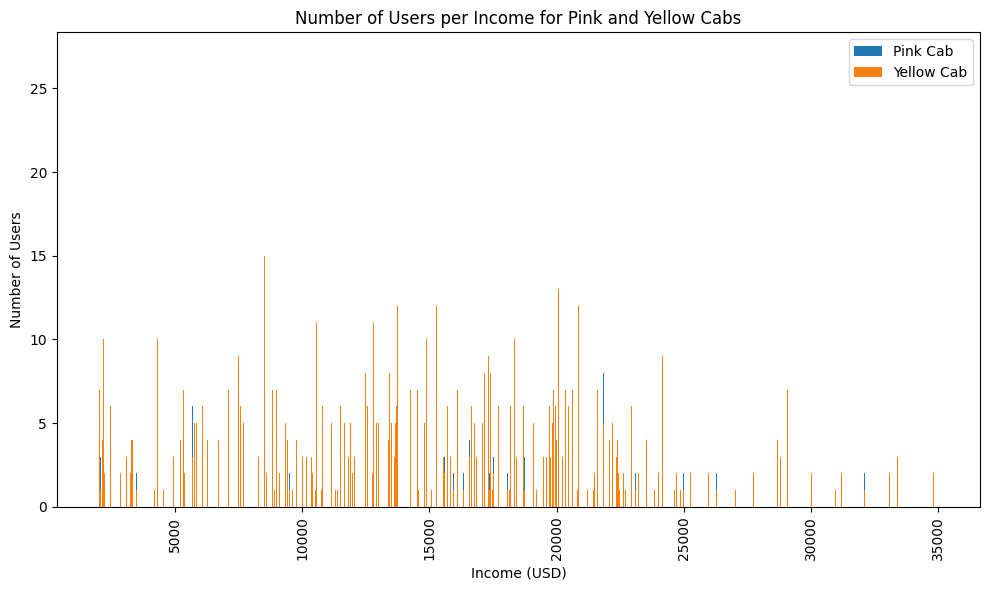

<Figure size 640x480 with 0 Axes>

In [ ]:
#This groups the DataFrame merged_df2 by two columns: Income (USD/Month) and Company. This means that the data will be organized into groups where each unique combination of income level and company is represented.

income_company_counts = merged_df2.groupby(['Income (USD/Month)', 'Company'])['Company'].count().unstack()
#removes the NaN values
income_company_counts.dropna(inplace = True)

#Resets index values into original default values like 0, 1, 2
income_company_counts = income_company_counts.reset_index()

#The figure size of the graph
plt.figure(figsize=(10, 6))

#This line iterates through all the columns of the income_company_counts DataFrame, starting from the second column (index 1) onward.
#The loop will generate a series of bar charts, one for each company, where each bar represents the count of that company at each income level.
for company in income_company_counts.columns[1:]:
    plt.bar(income_company_counts['Income (USD/Month)'], income_company_counts[company], label=company)

#x label
plt.xlabel('Income (USD)')
#y label
plt.ylabel('Number of Users')
#Title
plt.title('Number of Users per Income for Pink and Yellow Cabs')
#Rotating the x values to 90 degrees
plt.xticks(rotation=90)
#Providingt he particular colors for values
plt.legend()
#adjust the spacing between subplots to minimize overlap and ensure that all elements are neatly contained within the figure area.
plt.tight_layout()
#output the graph
plt.show()
#downloading the graph image into png
plt.savefig('bar_chart_income_new.png')

# Hypothesis Result for Bar Chart of Number of Users per Income

# The bar chart above depicts the relationship between customer income and the usage of Pink and Yellow Cabs.
# It appears that across various income levels, Yellow Cabs tend to have a larger user base compared to Pink Cabs.
# This observation reinforces the potential market share dominance of Yellow Cabs.
# It is noticeable that as income levels increase, the user count for both Pink and Yellow Cabs also tends to increase, though the difference in user counts between the two companies seems consistent across different income brackets.
# If this trend continues, it suggests a strong preference for Yellow Cabs among customers regardless of their income level, potentially translating into greater profitability for the Yellow Cab company.
# This information can assist XYZ firm in making investment decisions, potentially favoring the Yellow Cab company due to its extensive user base across different income segments.

# EDA Recommendations:
# Further examination of the customer demographic, such as locations.